# Performance Metrics

This Jupyter Notebook demonstrates both how to implement common performance metrics as well as how to interpret them using artificial data and a basic knn classifier. 

#### Missing library

Numpy, sklearn and matplotlib are included in the Anaconda installation. Otherwise, they can be installed using pip by running the following lines separately in the command line. 
```
pip install matplotlib
pip install numpy
pip install scikit-learn
```
The *my_plot* library is provided with this notebook and must be in the same directory as the notebook. Its purpose is to remove any code not relevant to the demonstration of performance measures such as generating the training and test datasets and plotting the graphs for visualization. 


## Setup

In the setup block we first import the necessary libraries and modules. Next, we define the total number of samples that will be created by the *generate_dataset* function. 

*generate_dataset* requires the total number of samples, the mean and standard deviation for both x and y coordinates for two classes (x1_mean, x1_std, y1_mean, y1_std, x2_mean, x2_std, y2_mean, y2_std). The last parameter indicates the class ratio. For a ratio of 1, both classes are equally distributed, larger values shift the balance in favour of the **P**-class. For example, a ratio of 3 will see 3**P** for every **N**. 

*train_test_split* is a function from the sklearn package which randomly splits the dataset into training and test data according to the ratio defined by *test_size*. While it is randomly decided which sample will belong to which dataset, the class ratio is maintained in both training and test data. The *random_state* parameter can be used to initialize the RNG used for splitting. 

Using the *my_plot()* function we can visualize the created dataset to visually inspect the distribution and determine which issues a classifier might face. *my_plot()* can visualize 1 or 2 datasets consisting of a **P** and **N** class each. Setting the first parameter to **TRUE** will limit both x and y axis to [-10;10] for consistent visualization, otherwise they will be scaled to fit the given data. 



## Prepared Datasets

There are a few prepared datasets in the first code cell, which can be selected by uncommenting the desired line. These are designed to highlight various issues you may face in real-life datasets. Keep in mind that those datasets are generated each time so minor variations may occur.

1. A dataset designed to demonstrate the performance metrics by producing both correct and false classifications of all types.

2. Identical dataset but **P** class has 10 times more samples than **N** class, showing the influence of imbalanced classes.

3. Dataset with clearly separated classes which can usually be linearly separated. Can result in 100% correct classifications for **P** and **N**.

4. Cross-shaped intersecting classes centered at (0,0). Balanced classes.

5. Balanced dataset with both classes sharing the same x- and y-coordinate mean, but different standard deviation. **N** class is completely surrounded by **P** class.

6. Same values as 5. but with a 10:1 class ratio. 

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import my_plot


count = 1000

#Uncomment one dataset to use, then use "Restart kernel and run entire Notebook"

#1 Balanced dataset with overlapping classes and mediocre accuracy of about 0.6-0.7
#X, y = my_plot.generate_dataset(count,  1,3,1,3,  3,3,3,3, 1) 

#2 Unbalanced dataset with identical values as before
#X, y = my_plot.generate_dataset(count,  1,3,1,3,  3,3,3,3, 10) 


#3 Balanced dataset with strongly separated classes and very good accuracy of more than 0.95
#X, y = my_plot.generate_dataset(count,  5,3,5,3,  -5,3,-5,3, 1)


#4 Balanced dataset with cross-shaped intersecting classes 
X, y = my_plot.generate_dataset(count,  0,5,0,0.1,  0,0.1,0,5, 1)


#5 Balanced dataset with nested classes sharing the same centroid
#X, y = my_plot.generate_dataset(count,  0,5,0,5,  0,1,0,1, 1)

#6 Unbalanced dataset with nested classes sharing the same centroid 
#X, y = my_plot.generate_dataset(count,  0,5,0,5,  0,1,0,1, 10)





X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


X2, y2 = my_plot.generate_dataset(count,  8,8,1,1,  5,8,-3,3,  3)


my_plot.my_plot(True, X1=X_train, y1=y_train, X2=None,y2=None)

<Figure size 640x480 with 1 Axes>

# Confusion Matrix

The first step in evaluating our knn classifier is to create the confusion matrix. For this, we need the predicted class labels from the classifier - *predicted* - and the actual labels that were generated alongside the test data, our ground truth - *truth*. 

Using those two lists or arrays, we simply compare the values in *truth* and *predicted* and increment the outcome class - TP, TN, FP, FN - depending on the permutation. 

In [4]:
def confusion_matrix(predicted, truth):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i in range(0, len(predicted)):
        if (predicted[i] == 1 and truth[i] == 1):
            true_positive += 1
        elif (predicted[i] == 0 and truth[i] == 0):
            true_negative += 1
        elif (predicted[i] == 1 and truth[i] == 0):
            false_positive += 1
        elif (predicted[i] == 0 and truth[i] == 1):
            false_negative += 1

    return true_positive, true_negative, false_positive, false_negative



TP, TN, FP, FN = confusion_matrix(pred, y_test)


print('True Positive:  '  + str(TP))
print('True Negative:  '  + str(TN))
print('False Positive: '  + str(FP))
print('False Negative: '  + str(FN))

True Positive:  146
True Negative:  148
False Positive: 2
False Negative: 4


# Classification Metrics

Using the values from the confusion matrix, we can now calculate basic classification metrics as well as those derived from them using the formulas given in the presentation. For derived metrics such as the F1 score with more than one way to calculate, both methods are usually within the precision of the data type as shown. 

In [3]:
import math

TP = 30
TN = 930
FP = 30
FN = 10

#Accuracy
ACC = (TP+TN)/(TP+TN+FP+FN)
#Sensitivity, recall, hit rate, True Positive Rate
TPR = TP/(TP+FN)
#Specificity, selectivity, True Negative Rate
TNR = TN/(TN+FP)
#Precision, Positive Predictive Value
PPV = TP/(TP+FP)

#F score, F1 score, F measure
F1 = 2*(PPV*TPR)/(PPV+TPR)
F1_alt = (2*TP)/(2*TP+FP+FN)

#Informedness, Bookmaker Informedness
BM = TPR+TNR-1

#Markedness
MK = TPR+TPR-1

#Matthews Correlation Coefficient 
MCC = (TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

#print(tabulate([['Accuracy', ACC],['Sensitivity (TPR)', TPR], ['Specificity (TNR)', TNR]
#               ['F1 score (F1)', F1], ['F1 score alternative', F1_alt], ['Informedness (BM)', BM],
#               ['Markedness (MK)', MK], ['Matthews Correlation Coefficient (MCC)', MCC]], 
#               headers = ['Metric', 'Value']))


print('Accuracy: \t\t\t\t'                   + str(ACC))
print('Sensitivity (TPR): \t\t\t'            + str(TPR))
print('Specificity (TNR): \t\t\t'            + str(TNR))
print('Precision (PPV): \t\t\t'              + str(PPV))
print('')
print('F1 score (F1): \t\t\t\t'              + str(F1))
print('F1 score alternative: \t\t\t'         + str(F1_alt))
print('')
print('Informedness: \t\t\t\t'               + str(BM))
print('Markedness: \t\t\t\t'                 + str(MK))
print('Matthews Correlation Coefficient: \t' + str(MCC))

Accuracy: 				0.96
Sensitivity (TPR): 			0.75
Specificity (TNR): 			0.96875
Precision (PPV): 			0.5

F1 score (F1): 				0.6
F1 score alternative: 			0.6

Informedness: 				0.71875
Markedness: 				0.5
Matthews Correlation Coefficient: 	0.5930672165988061


# Preparation for ROC and AUC

The *predict_proba()* function of the kNN-classifier returns the probability for a sample to belong to each class. In our case, this means we get two values, which sum up to 1.0. For kNN-classifiers on a two-class problem, the value for **k** defines the percentage steps, as each neighbour 'votes' for its class. For **k** = 3, there can only be, 0, 1, 2 or 3 votes for class **P**, so 0%, 33%, 67% or 100% of the votes. Other classifiers may give continuous percentages.

For this example, **k** = 10 is chosen as it gives easy to understand 10% increments. It also allows us to simplify the evaluation of the predictions, as changes in classification will only happen at those 10% increments. 

In [6]:
# k=10 classifier setup and fit
knc_auc = KNeighborsClassifier(n_neighbors=10)
knc_auc.fit(X, y)

#Predict probabilities for the test samples and delete the column 
#containing the N-percentages 
prob = np.delete(knc_auc.predict_proba(X_test), 0,1)

#Matrix to hold the predictions of all test variables depending on the variable threshold 
prob_predicts = np.empty((11, len(prob)))

#Array containing the hard-coded percentage limits for discrete sampling
fixed_threshold = np.linspace(0,1,11) #[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#Predict the class for each test sample depending on the percentage threshold
for i in range (0,11):
    for j in range (0, len(prob)):
        if prob[j] <= fixed_threshold[i]:
            prob_predicts[i][j] = 0
        else:
            prob_predicts[i][j] = 1
            
#Matrix to hold the counts for TP, TN, FP and FN for each percentage threshold            
conf_matrix_ROC = np.empty((len(fixed_threshold),4))

for i in range(0,len(fixed_threshold)):
    conf_matrix_ROC[i] = confusion_matrix(prob_predicts[i], y_test)

print('  TP  TN  FP   FN')
print(conf_matrix_ROC)

  TP  TN  FP   FN
[[150. 142.   8.   0.]
 [150. 143.   7.   0.]
 [149. 143.   7.   1.]
 [149. 143.   7.   1.]
 [147. 144.   6.   3.]
 [146. 148.   2.   4.]
 [145. 148.   2.   5.]
 [143. 149.   1.   7.]
 [139. 150.   0.  11.]
 [138. 150.   0.  12.]
 [  0. 150.   0. 150.]]


# Creating the ROC curve

For the ROC curve, we need the False Positive Rate **FPR** (or 1-specificity) on the x-axis and the True Positive Rate **TPR**, also called Sensitivity, on the y-axis. In this case, the *matplotlib* plotting procedure is included to demonstrate its use and because it is relevant to the metric at display. 

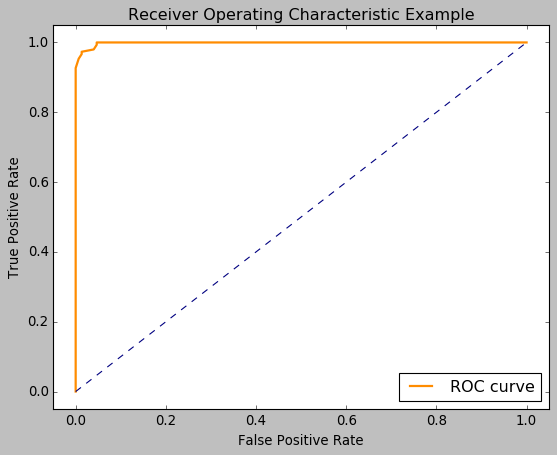

In [7]:
TPR_list = np.empty(len(fixed_threshold)+1)
FPR_list = np.empty(len(fixed_threshold)+1)

#Set final values in the top right corner for complete graph
TPR_list[0] = 1
FPR_list[0] = 1

for i in range(0, len(fixed_threshold)):
    #Copy values from confusion matrix for better readability in the actual calculation
    iTP = conf_matrix_ROC[i][0]
    iTN = conf_matrix_ROC[i][1]
    iFP = conf_matrix_ROC[i][2]
    iFN = conf_matrix_ROC[i][3]
    
    #True Positive Rate
    TPR_list[i+1] = iTP/(iTP+iFN)
    #False Positive Rate
    FPR_list[i+1] = iFP/(iFP+iTN)



#Create new figure
plt.figure()

#plot(x-coordinates, y-coordinates, line colour, line width, label) for the ROC curve
plt.plot(FPR_list, TPR_list, color='darkorange', lw=2,
         label='ROC curve')

#Plot a diagonal line from (0,0) to (1,1) representing random guesses in a balanced dataset
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

#Set the intervals of the x- and y-axis
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

#Set names for the x- and y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Set graph title
plt.title('Receiver Operating Characteristic Example')

#Set legend position
plt.legend(loc="lower right")

#Render the graph
plt.show()

# R² - Coefficient of Determination

As the name indicates, the coefficient of determination (CoD) is simply the correlation coefficient squared. Incidentially, this makes the CoD better interpretable. For example, comparing the correlation coefficients of two regression models of $r_1 = 0.5$ and $r_2 = 0.7$, it is not immediately clear how much better the latter value actually is, or how good either of them describes the dataset. Using their squared values, however, we find $r_1^2 = 0.5² = 0.25$  and $r_2^2 = 0.7² = 0.49$. We can now say, that the model producing $r_1$ explains only $1/4$th of the variance in the dataset, whereas the second model explains half the variance. For the same dataset, this would indicate that model 2 is twice as good as model 1. 

To calculate the CoD without first calculating the correlation coefficient *r* we can use the variance of the dataset *X* using either the mean of the dataset $\mu$ or the variance compared to the prediction - in this case described by a function f(x).

$$\mu = \frac {\sum\limits_{i=0}^{n} y_i}{n}$$


$$Var_{mean}(X) = \sum\limits_{i=0}^{n} (y_i - \mu)²$$


$$Var_{predict}(X) = \sum\limits_{i=0}^{n} (y_i - f(x_i))²$$


$$R² = \frac{Var_{mean}(X) - Var_{predict}(X)}{Var_{mean}(X)}$$



To interpret the final formula: The less the predicted values differ from the actual values (i.e. $Var_{predict}$ is very small), the closer the numerator is to $Var_{mean}$. Dividing by $Var_{mean}$ normalizes the result which leads to a percentage value. 

**Task:** Change the value for the standard deviation in line 4 to see how a more noisy dataset affects the R² value.



*Note:* For different datasets, the threshold for what an acceptable or significant CoD is can vary. If a dataset has only two features and one feature delivers a CoD of 0.25, the other variable should perform much better or the dataset is exceptionally noisy. If a second dataset has 1 million features and a single feature shows a CoD of 0.25 - meaning it explains 25% of the whole dataset on its own - which is very significant. 

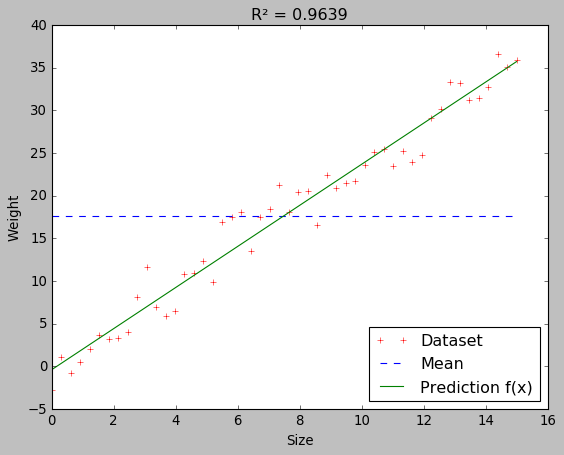

In [13]:
#Parameters for y=mx+t to create a linear dataset. std defines standard deviation of the y-values from the line.
m = 2.5
t = -1
std = 2

#Create uniformly spaced x-coordinates
Xr = np.linspace(0,15,50)
Xr = Xr.reshape(-1,1)

#y values follow a linear equation with random deviations added using a normal distribution
yr = np.empty(50)
for i in range(0, len(Xr)):
    yr[i] = (m*Xr[i]+t) + np.random.normal(0,std)


#Perform linear regression to fit a line to the dataset
reg = LinearRegression().fit(Xr, yr)

#Predict the y-values for each sample in the dataset using the linear regression model
yr_predict = reg.predict(Xr)    

    
#Calculate the mean 𝜇 of the dataset  
yr_mean = np.mean(yr) 

#Calculate the variance from the mean by subtracting the mean from each array entry, then squaring each entry and 
#taking the sum of all values. For the variance of the prediction, the two arrays are subtracted pairwise before 
#squaring and summation
var_mean = np.sum((yr-yr_mean)**2)
var_predict = np.sum((yr-yr_predict)**2)

#Calculate R² according to the formula above
R_squared = (var_mean-var_predict)/var_mean


#Plot the dataset, mean and prediction
plt.plot(Xr, yr, color='red', marker='+', ls='', label='Dataset')
plt.plot([0,15], [yr_mean, yr_mean], color='blue', ls='--', label='Mean')
plt.plot(Xr, yr_predict, color='green', ls='-', label='Prediction f(x)')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.legend(loc="lower right")
plt.title('R² = {:1.4f}'.format(R_squared))
plt.show()

# Using confusion matrix from sklearn

In [1]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[2 2]
 [1 5]]
Outcome values : 
 2 2 1 5
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

